In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
columns = ['UserID', 'Movie ID', 'Rating']
data = pd.read_csv("ydata-ymovies-user-movie-ratings-train-v1_0-txt.csv", names = columns)
movies = pd.read_csv("movie_db_yoda.csv")
data1 = data.iloc[1:]
data1.head(5)


C:\Users\unnat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UserID,Movie ID,Rating
1,1,1800029049,5
2,1,1804857429,4
3,1,1800030906,5
4,1,1800018548,5
5,1,1800256362,4


In [42]:
movie = movies[['Movie ID', 'Title', 'Genres']]
movie_data = pd.merge(data1, movie)
movie_data.head(6)


,UserID,Movie ID,Rating,Title,Genres
0,1,1800029049,5,Arsenic and Old Lace (1944),Comedy
1,1099,1800029049,5,Arsenic and Old Lace (1944),Comedy
2,2422,1800029049,4,Arsenic and Old Lace (1944),Comedy
3,3984,1800029049,5,Arsenic and Old Lace (1944),Comedy
4,5657,1800029049,5,Arsenic and Old Lace (1944),Comedy
5,6100,1800029049,5,Arsenic and Old Lace (1944),Comedy


In [156]:
top_movies = movie_data.Title.value_counts()[:10]
plt.figure(figsize=(12, 8))
pos = np.arange(len(top_movies))
plt.barh(pos, top_movies.values, color = 'purple');
plt.yticks(pos, top_movies.index);
plt.title('Most Rated Movies')
plt.ylabel('Title')

Text(0,0.5,'Title')

In [157]:
top_movies

Freaky Friday (2003)                              1213
Spy Kids 3D: Game Over (2003)                     1085
Bend It Like Beckham (2003)                        903
Titanic (1997)                                     873
Star Wars (1977)                                   659
Dumb and Dumberer: When Harry Met Lloyd (2003)     559
Terminator 2 - Judgment Day (1991)                 544
Lost in Translation (2003)                         467
Saving Private Ryan (1998)                         448
The Sixth Sense (1999)                             440
Name: Title, dtype: int64

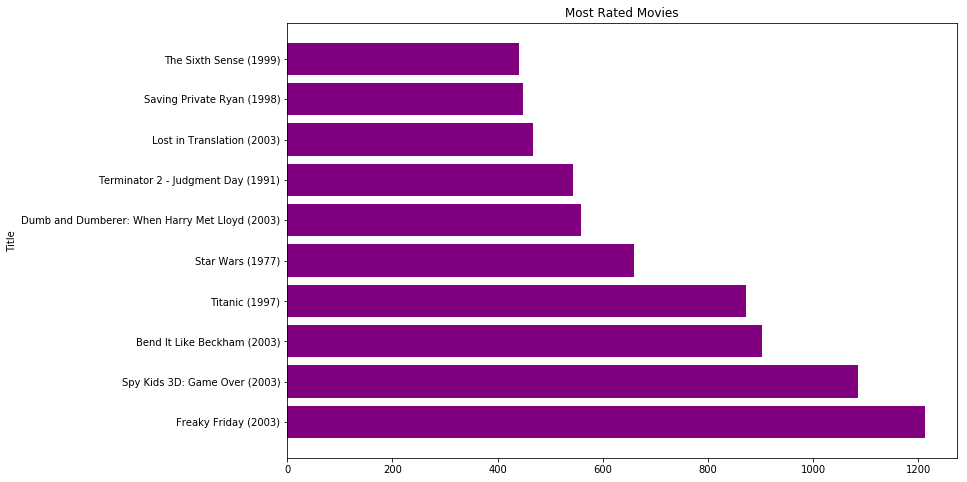

In [158]:
plt.show()

In [112]:
movie_data['Genre_Split'] = movie_data['Genres'].str.split('|')
movie_data.head()


,UserID,Movie ID,Rating,Title,Genres,Genre_Split
0,1,1800029049,5,Arsenic and Old Lace (1944),Comedy,[Comedy]
1,1099,1800029049,5,Arsenic and Old Lace (1944),Comedy,[Comedy]
2,2422,1800029049,4,Arsenic and Old Lace (1944),Comedy,[Comedy]
3,3984,1800029049,5,Arsenic and Old Lace (1944),Comedy,[Comedy]
4,5657,1800029049,5,Arsenic and Old Lace (1944),Comedy,[Comedy]


In [183]:
top_genres = []
for i in movie_data['Genre_Split']:
    if(isinstance(i, list)):
        for j in i:
            x = i.count(j)
            top_genres.append(x)


In [7]:
top_genres = movie_data.Genres.value_counts()[:16]
top_genres = top_genres.drop(top_genres.index[2])
plt.figure(figsize=(12, 8))
pos = np.arange(len(top_genres))
plt.barh( pos, top_genres.values, color = 'indigo');
plt.yticks(pos,top_genres.index);
plt.title('Most Rated Genres')
plt.ylabel('Genre')

Text(0,0.5,'Genre')

In [8]:
top_genres.drop(top_genres.index[2])

Comedy                                                        9336
Drama                                                         7294
Suspense/Horror                                               2468
Science Fiction/Fantasy                                       1744
Thriller                                                      1098
Action/Adventure|Kids/Family|Science Fiction/Fantasy          1085
Drama|Crime/Gangster                                          1081
Kids/Family                                                    944
Romance|Drama                                                  873
Art/Foreign                                                    861
Action/Adventure|Drama                                         766
Action/Adventure|Thriller|Science Fiction/Fantasy|Thriller     659
Comedy|Drama                                                   647
Thriller|Drama                                                 636
Name: Genres, dtype: int64

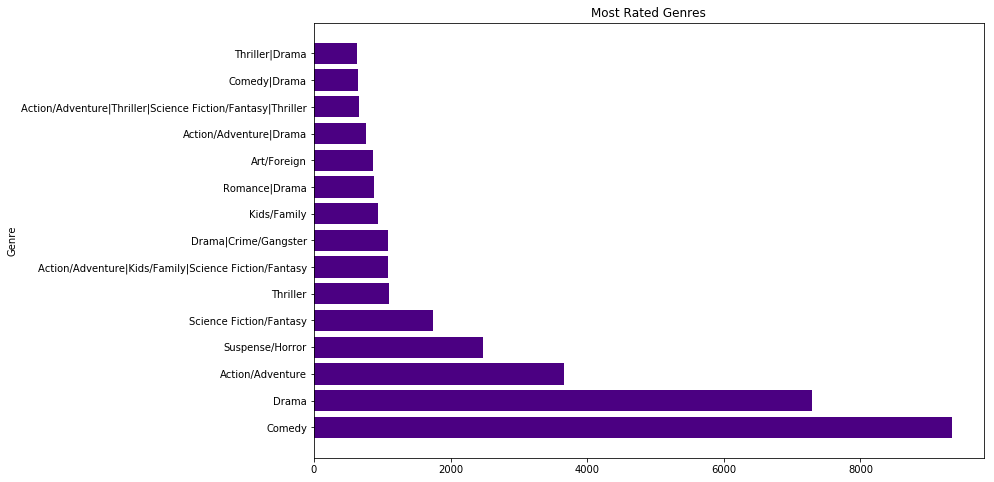

In [9]:
plt.show()

In [43]:
top_users = movie_data.UserID.value_counts()[:10]
plt.figure(figsize=(12, 8))
pos = np.arange(len(top_users))
plt.barh( pos, top_users.values, color = 'green');
plt.yticks(pos,top_users.index);
plt.title('Top 10 Users who gave the most ratings')
plt.ylabel('User ID')

Text(0,0.5,'User ID')

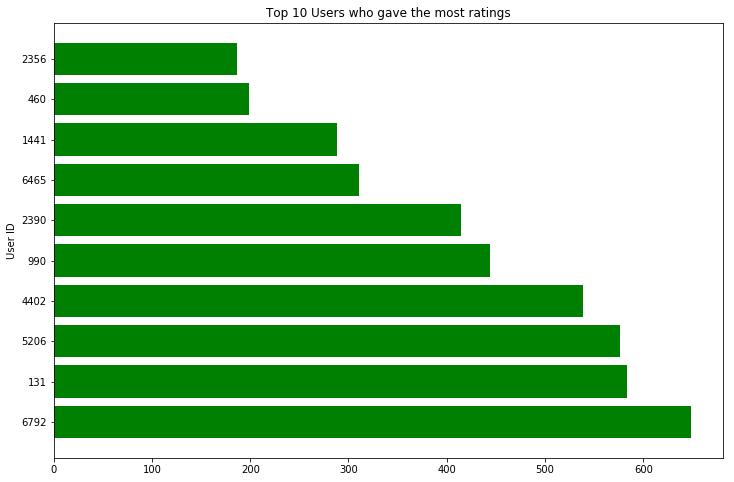

In [44]:
plt.show()

In [45]:
top_users

6792    649
131     583
5206    576
4402    539
990     444
2390    414
6465    311
1441    288
460     199
2356    187
Name: UserID, dtype: int64

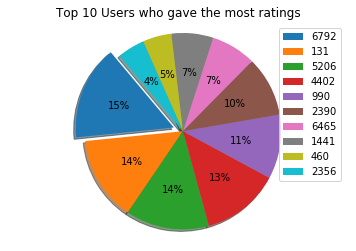

In [57]:
explode = (0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)
plt.pie(top_users.values, explode = explode, autopct='%0.0f%%',shadow=True, startangle=130)
plt.legend(labels = top_users.index, loc = 'upper right')
plt.title("Top 10 Users who gave the most ratings")
plt.axis('equal')
plt.show()

In [70]:
movie_data['genre_arr'] = movie_data['Genres'].str.split('|')
movie_data.head(5)

,UserID,Movie ID,Rating,Title,Genres,genre_arr
0,1,1800029049,5,Arsenic and Old Lace (1944),Comedy,[Comedy]
1,1099,1800029049,5,Arsenic and Old Lace (1944),Comedy,[Comedy]
2,2422,1800029049,4,Arsenic and Old Lace (1944),Comedy,[Comedy]
3,3984,1800029049,5,Arsenic and Old Lace (1944),Comedy,[Comedy]
4,5657,1800029049,5,Arsenic and Old Lace (1944),Comedy,[Comedy]


In [1]:
genre = {'Adventure': 1117, 'Animation': 447, 'Children': 583, 'Drama': 3315, 'Fantasy': 654, 'Romance': 1545, 'Comedy': 4365, 'Action': 1545, 'Crime': 1100, 'Thriller': 1729, 'Horror': 877, 'Mystery': 543, 'Sci-Fi': 792, 'Documentary': 495, 'IMAX': 153, 'War': 367, 'Musical': 394, 'Western': 168, 'Film-Noir': 133, '(no genres listed)': 18}
genre

{'(no genres listed)': 18,
 'Action': 1545,
 'Adventure': 1117,
 'Animation': 447,
 'Children': 583,
 'Comedy': 3315,
 'Crime': 1100,
 'Documentary': 495,
 'Drama': 4365,
 'Fantasy': 654,
 'Film-Noir': 133,
 'Horror': 877,
 'IMAX': 153,
 'Musical': 394,
 'Mystery': 543,
 'Romance': 1545,
 'Sci-Fi': 792,
 'Thriller': 1729,
 'War': 367,
 'Western': 168}

In [23]:
genre.keys()

dict_keys(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'Documentary', 'IMAX', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)'])

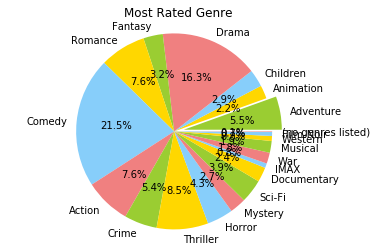

In [95]:
explode = (0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)
plt.pie(genre.values(), labels= genre.keys(),explode = explode,autopct='%0.1f%%', colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] )
plt.title("Most Rated Genre")
#plt.legend(, loc = 'right')
plt.axis('equal')
plt.show()

In [43]:
movie_data.head()

,UserID,Movie ID,Rating,Title,Genres
0,1,1800029049,5,Arsenic and Old Lace (1944),Comedy
1,1099,1800029049,5,Arsenic and Old Lace (1944),Comedy
2,2422,1800029049,4,Arsenic and Old Lace (1944),Comedy
3,3984,1800029049,5,Arsenic and Old Lace (1944),Comedy
4,5657,1800029049,5,Arsenic and Old Lace (1944),Comedy


In [44]:
mdata = movie_data[['Title','Genres']]

In [45]:
mdata.head()

,Title,Genres
0,Arsenic and Old Lace (1944),Comedy
1,Arsenic and Old Lace (1944),Comedy
2,Arsenic and Old Lace (1944),Comedy
3,Arsenic and Old Lace (1944),Comedy
4,Arsenic and Old Lace (1944),Comedy


In [61]:
m =  mdata['Genres'].value_counts()[:20]

In [62]:
m

Comedy                                                        9336
Drama                                                         7294
\N                                                            3821
Action/Adventure                                              3663
Suspense/Horror                                               2468
Science Fiction/Fantasy                                       1744
Thriller                                                      1098
Action/Adventure|Kids/Family|Science Fiction/Fantasy          1085
Drama|Crime/Gangster                                          1081
Kids/Family                                                    944
Romance|Drama                                                  873
Art/Foreign                                                    861
Action/Adventure|Drama                                         766
Action/Adventure|Thriller|Science Fiction/Fantasy|Thriller     659
Comedy|Drama                                                  

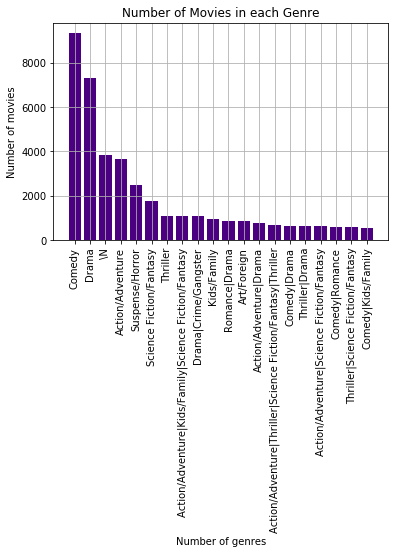

In [99]:
genre = m
x = list(range(len(genre)))
plt.xticks(x, genre.index, rotation=90)
plt.bar(x, genre.values, color = 'indigo')
plt.xlabel("Number of genres")
plt.ylabel("Number of movies")
plt.title('Number of Movies in each Genre')
plt.grid()
plt.plot()
plt.show()

In [101]:
m =  movie_data['Rating'].value_counts()
m.head()

5    26257
4    12453
3     3986
1     3963
2     1770
Name: Rating, dtype: int64

In [104]:
re = m
plt.figure(figsize=(12, 8))
pos = np.arange(len(re))
plt.barh(pos, re.values, color = 'violet');
plt.yticks(pos, re.index);
plt.title('Number of Movies per Rating')
plt.xlabel('Number of Movies')
plt.ylabel('Rating')

Text(0,0.5,'Rating')

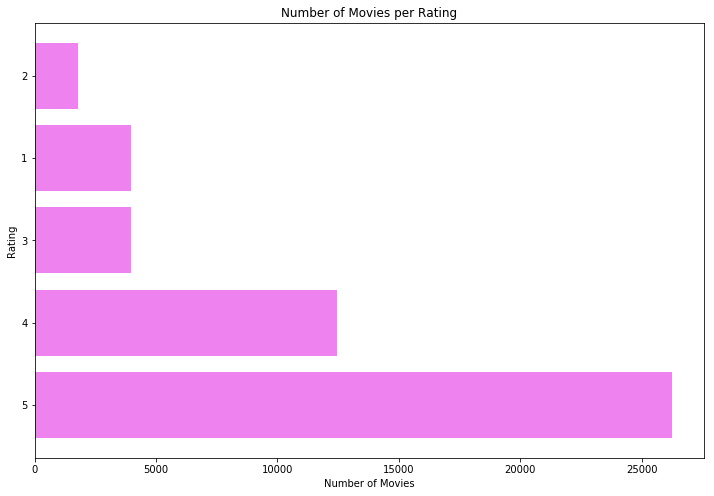

In [105]:
plt.show()